# Stock Price Prediction

In [1]:
# here we will first load in the stock data from a CSV file
import pandas as pd

file_path = '/Users/jaynama/Documents/ECE5831Project/AA.csv' 

# then we will read the CSV file into a pandas DataFrame
try:
    stock_data = pd.read_csv(file_path)
    print("Data loaded successfully and stored in the 'stock_data' variable.")
    print("DataFrame Head:")
    print(stock_data.head())

# exception handling in case the file is not found
except FileNotFoundError:
    print(f"ERROR: The file was not found at the specified path: {file_path}")
    print("Please double-check the path and the file name.")


Data loaded successfully and stored in the 'stock_data' variable.
DataFrame Head:
         Date      Open      High       Low     Close  Adj Close  Volume
0  1962-01-02  6.532155  6.556185  6.532155  6.532155   1.536658   55900
1  1962-01-03  6.532155  6.632280  6.524145  6.632280   1.560212   74500
2  1962-01-04  6.632280  6.664320  6.632280  6.632280   1.560212   80500
3  1962-01-05  6.632280  6.656310  6.616260  6.624270   1.558326   70500
4  1962-01-08  6.608250  6.608250  6.339915  6.408000   1.507450   93800


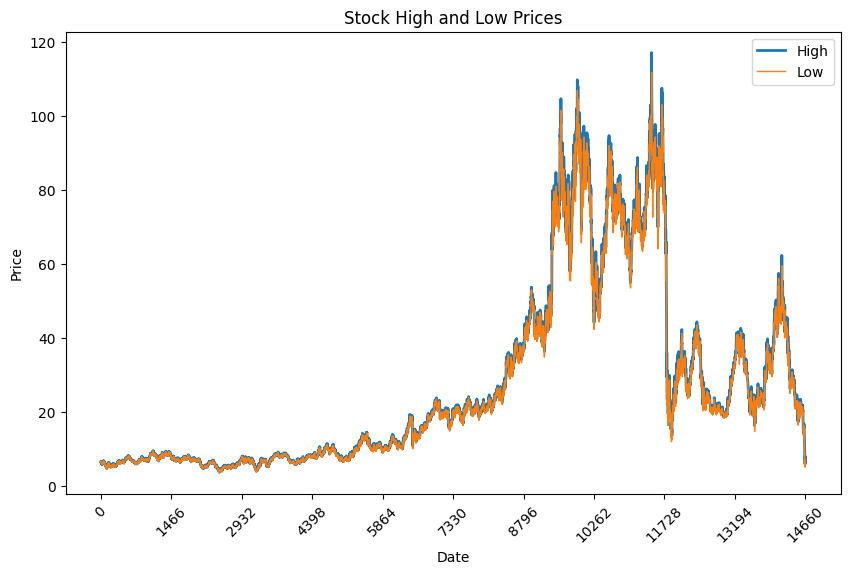

In [2]:
import matplotlib.pyplot as plt

# here we will plot the 'High' and 'Low' prices from the stock data
plt.figure(figsize=(10, 6))
plt.plot(stock_data['High'], label='High', linewidth=2)
plt.plot(stock_data['Low'], label='Low', linewidth=1)

# we will add titles and labels to the plot
plt.title('Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# then we will rotate the x-axis labels to avoid any overlap
plt.xticks(rotation=45)

# here we will also set x-ticks to show fewer labels for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  

plt.show()


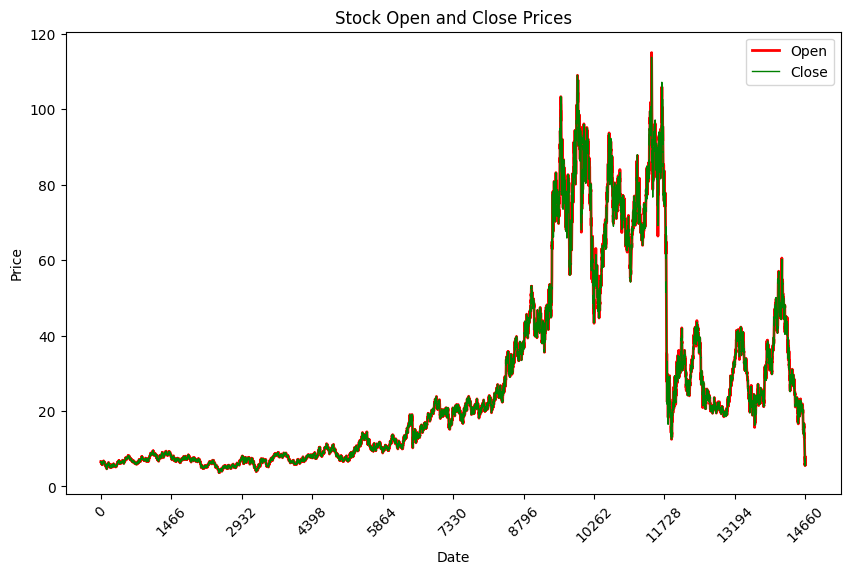

In [ ]:
# here we will plot the 'Open' and 'Close' prices from the stock data
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)
plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# once again we will be adding titles and labels to the plot
plt.title('Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# then we will rotate the x-axis labels to avoid any overlap
plt.xticks(rotation=45)

# here we will also set x-ticks to show fewer labels for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  

plt.show()


In [4]:
# so we will make sure that we have all the necessary imports for our project
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [5]:
# now here we will define our target variable and features so we will do data preprocessing first
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [6]:
# then here we will scale the data using StandardScaler so we are using this for feature scaling
sc = StandardScaler()
stock_data_ft = sc.fit_transform(stock_data.values)
stock_data_ft = pd.DataFrame(columns=stock_data.columns,
                            data=stock_data_ft,
                            index=stock_data.index)

In [7]:
# then we will define a function to split the data into sequences for LSTM input
def lstm_split(data, n_steps):
    X, y = [], []

    # so here we will create sequences of data for LSTM and corresponding targets
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1]) 
        y.append(data[i + n_steps - 1, -1]) 
    return np.array(X), np.array(y)


In [8]:
# so here we will split the data into training and testing sets and we will use 80% of the data for training and 20% for testing
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)
train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)


(14662, 1, 3) (11730, 1, 3) (2932, 1, 3) (2932,)


In [9]:
# so firtst we will define our LSTM model
lstm = Sequential()

# then we will add an LSTM layer with 32 units, ReLU activation, and return sequences set to True
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# then we will add a Dense output layer with 1 unit
lstm.add(Dense(1))

# then we will compile the model using mean squared error loss and Adam optimizer
lstm.compile(loss='mean_squared_error', optimizer='adam')

lstm.summary()

/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# and here will finally we will train the LSTM model on the training data
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/100
2346/2346 - 2s - 779us/step - loss: 0.0152 - val_loss: 0.1362
Epoch 2/100
2346/2346 - 1s - 500us/step - loss: 5.4655e-04 - val_loss: 0.2937
Epoch 3/100
2346/2346 - 1s - 504us/step - loss: 2.3178e-04 - val_loss: 0.2166
Epoch 4/100
2346/2346 - 1s - 504us/step - loss: 2.4446e-04 - val_loss: 0.1469
Epoch 5/100
2346/2346 - 1s - 565us/step - loss: 2.6096e-04 - val_loss: 0.1060
Epoch 6/100
2346/2346 - 1s - 514us/step - loss: 2.5887e-04 - val_loss: 0.0756
Epoch 7/100
2346/2346 - 1s - 529us/step - loss: 2.6021e-04 - val_loss: 0.0543
Epoch 8/100
2346/2346 - 1s - 543us/step - loss: 2.5700e-04 - val_loss: 0.0390
Epoch 9/100
2346/2346 - 1s - 512us/step - loss: 2.5567e-04 - val_loss: 0.0280
Epoch 10/100
2346/2346 - 1s - 621us/step - loss: 2.5542e-04 - val_loss: 0.0211
Epoch 11/100
2346/2346 - 1s - 491us/step - loss: 2.5481e-04 - val_loss: 0.0165
Epoch 12/100
2346/2346 - 1s - 513us/step - loss: 2.5602e-04 - val_loss: 0.0133
Epoch 13/100
2346/2346 - 1s - 634us/step - loss: 2.5683e-04 - val

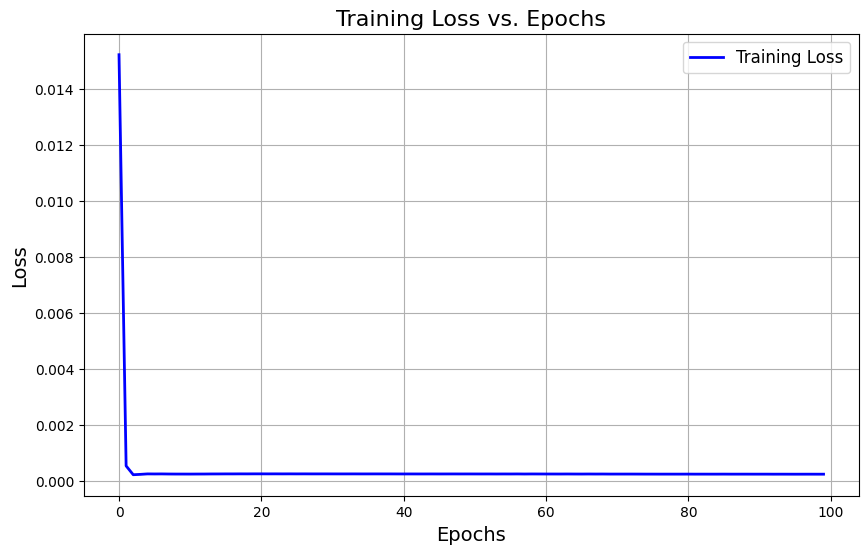

In [11]:
# so we will plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# and then we will add titles and labels to the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [12]:
# so we will make predictions on the test data using the trained LSTM model
y_pred = lstm.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [13]:
# and then we will print the shape of the predicted values
print(y_pred.shape)

(2932, 1, 1)


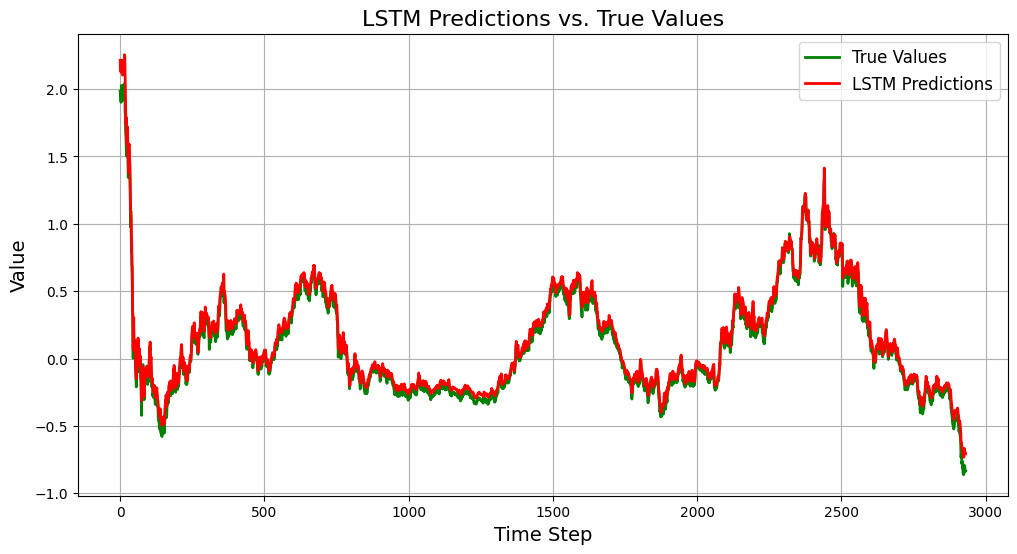

In [14]:
# so we will plot the true values and the LSTM predictions for comparison
import matplotlib.pyplot as plt

# here we will ensure that y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()
y_pred_flat = y_pred.squeeze()

# here we will plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# then we will add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


In [15]:
# finally we will print the shape of y_test for verification
print(y_test.shape)

(2932,)


In [16]:
# so here we will calculate and print the RMSE and MAPE metrics for the LSTM model's predictions
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_flat)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.04508080346956836
MAPE:  0.39647198491964103


# Deeper LSTM with 50 units per layer

Here we are working on a model that uses a stacked LSTM architecture with three LSTM layers, each containing 50 hidden units, to model temporal dependencies in stock price sequences. The first two LSTM layers return full sequences, allowing the network to learn increasingly abstract temporal features across layers, while the final LSTM layer produces a compact representation used to predict the next price through a dense output layer. The model is trained using mean squared error loss and the Adam optimizer, with training performed without shuffling to preserve time order. By increasing depth, this architecture aims to capture both short-term fluctuations and longer-term trends in the data, serving as a higher-capacity recurrent baseline for comparison with simpler and more complex models.

In [17]:
# here we will redefine the LSTM model with three LSTM layers and more units
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

# then we will add a Dense output layer with 1 unit
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# then we will train the new LSTM model on the training data
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
2933/2933 - 5s - 2ms/step - loss: 0.0262
Epoch 2/100
2933/2933 - 3s - 1ms/step - loss: 0.0072
Epoch 3/100
2933/2933 - 3s - 1ms/step - loss: 0.0013
Epoch 4/100
2933/2933 - 4s - 1ms/step - loss: 7.6286e-04
Epoch 5/100
2933/2933 - 4s - 1ms/step - loss: 0.0014
Epoch 6/100
2933/2933 - 4s - 1ms/step - loss: 0.0023
Epoch 7/100
2933/2933 - 4s - 1ms/step - loss: 0.0027
Epoch 8/100
2933/2933 - 4s - 1ms/step - loss: 0.0023
Epoch 9/100
2933/2933 - 3s - 896us/step - loss: 0.0021
Epoch 10/100
2933/2933 - 4s - 1ms/step - loss: 0.0020
Epoch 11/100
2933/2933 - 4s - 1ms/step - loss: 0.0019
Epoch 12/100
2933/2933 - 4s - 1ms/step - loss: 0.0018
Epoch 13/100
2933/2933 - 4s - 1ms/step - loss: 0.0017
Epoch 14/100
2933/2933 - 4s - 1ms/step - loss: 0.0016
Epoch 15/100
2933/2933 - 4s - 1ms/step - loss: 0.0015
Epoch 16/100
2933/2933 - 4s - 1ms/step - loss: 0.0014
Epoch 17/100
2933/2933 - 3s - 1ms/step - loss: 0.0014
Epoch 18/100
2933/2933 - 4s - 1ms/step - loss: 0.0013
Epoch 19/100
2933/2933 - 3s - 1

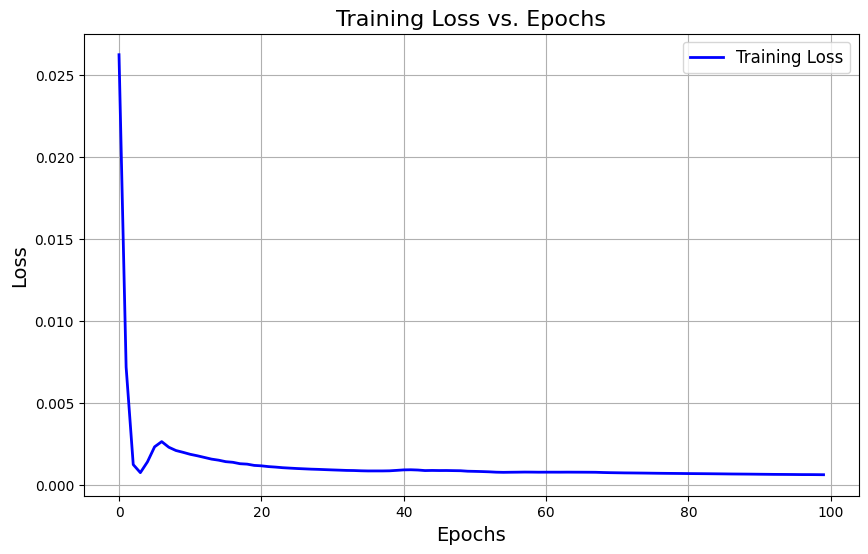

In [19]:
# here we will now we will plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# now we will add titles and labels to the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [20]:
# then we will make predictions on the test data using the new LSTM model
y_pred = lstm.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
# and then we will print the shape of the predicted values
print(y_pred.shape)

(2932, 1)


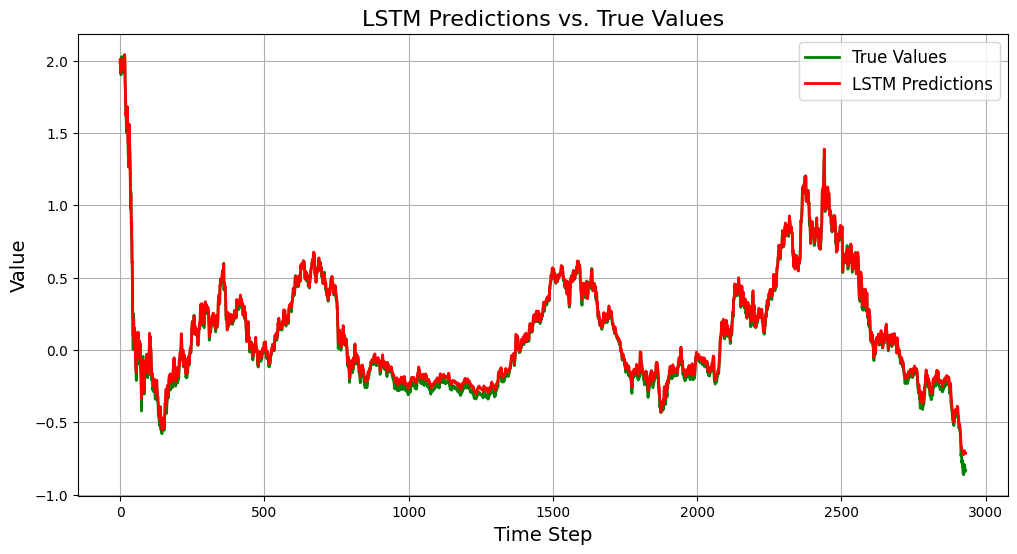

In [22]:
import matplotlib.pyplot as plt

# here we will ensure that y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# then we will plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# and then we will add titles and labels
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [23]:
# and now we will calculate and print the RMSE and MAPE metrics for the new LSTM model's predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.02730900216856553
MAPE:  0.24787895161340132


# LSTM with Increased Input Window (10 Time Steps)

Here now, the input sequence length is increased to 10 time steps, allowing the LSTM to observe a longer historical context when making predictions. The model architecture remains a three-layer stacked LSTM with 50 units per layer, but the expanded input window enables the network to capture longer-term temporal dependencies and smoother trends across a wider time horizon. By providing more past information per sample, this configuration aims to improve stability and reduce short-term noise sensitivity compared to shorter input windows. The model is trained without shuffling to preserve temporal order, and results show improved alignment with true values, indicating that increasing the lookback window can enhance predictive performance for stock price time series.


In [24]:
# so first we will redefine the data splitting with n_steps=10
n_steps=10
X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

# then we will split the data into training and testing sets with 80% for training and 20% for testing
train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

# and finally we will create the training and testing sets
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(14653, 10, 3) (11723, 10, 3) (2930, 10, 3) (2930,) (2930,)


In [25]:
# here we will redefine our LSTM model with 3 LSTM layers for better performance
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

# then we will add a Dense output layer with 1 unit
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# then we will train the new LSTM model on the training data
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
2931/2931 - 14s - 5ms/step - loss: 0.0211
Epoch 2/100
2931/2931 - 11s - 4ms/step - loss: 0.0278
Epoch 3/100
2931/2931 - 11s - 4ms/step - loss: 0.0232
Epoch 4/100
2931/2931 - 11s - 4ms/step - loss: 0.0249
Epoch 5/100
2931/2931 - 11s - 4ms/step - loss: 0.0214
Epoch 6/100
2931/2931 - 11s - 4ms/step - loss: 0.0171
Epoch 7/100
2931/2931 - 10s - 3ms/step - loss: 0.0113
Epoch 8/100
2931/2931 - 11s - 4ms/step - loss: 0.0101
Epoch 9/100
2931/2931 - 11s - 4ms/step - loss: 0.0077
Epoch 10/100
2931/2931 - 11s - 4ms/step - loss: 0.0052
Epoch 11/100
2931/2931 - 10s - 3ms/step - loss: 0.0049
Epoch 12/100
2931/2931 - 11s - 4ms/step - loss: 0.0085
Epoch 13/100
2931/2931 - 10s - 3ms/step - loss: 0.0051
Epoch 14/100
2931/2931 - 12s - 4ms/step - loss: 0.0041
Epoch 15/100
2931/2931 - 11s - 4ms/step - loss: 0.0041
Epoch 16/100
2931/2931 - 11s - 4ms/step - loss: 0.0037
Epoch 17/100
2931/2931 - 11s - 4ms/step - loss: 0.0036
Epoch 18/100
2931/2931 - 10s - 3ms/step - loss: 0.0034
Epoch 19/100
2931/2

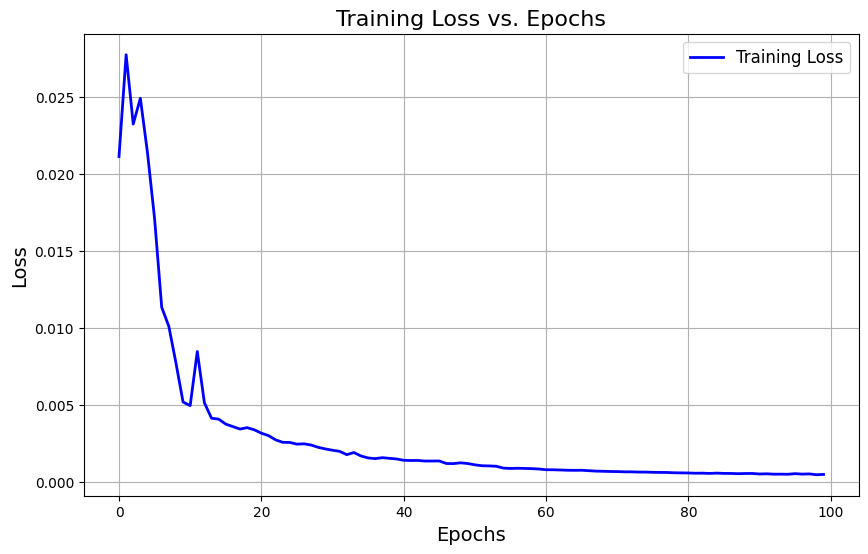

In [27]:
# and now we will plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Here we will add titles and labels to the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [28]:
# here we will make predictions on the test data using the new LSTM model 
y_pred = lstm.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [29]:
# amd then we will print the shape of the predicted values
print(y_pred.shape)

(2930, 1)


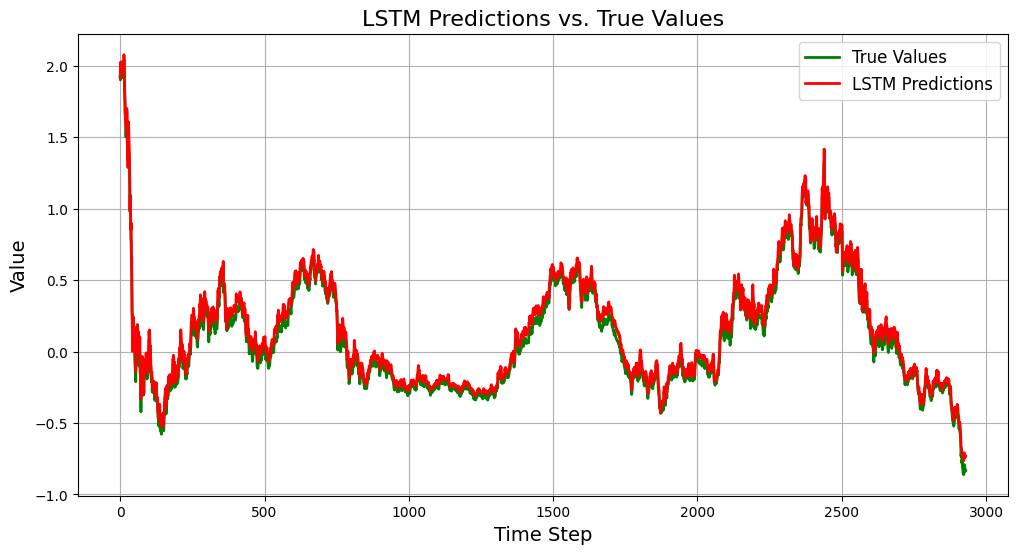

In [30]:
import matplotlib.pyplot as plt

# so first we will ensure that y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# then we will plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# then we will add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [31]:
# finally we will calculate and print the RMSE and MAPE metrics for the new LSTM model's predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.04959276699107511
MAPE:  0.7180667150232616


# Let's do the comparison with Simple Moving Average and Exponential Moving Average

# SMA

Simple Moving Average (SMA) model serves as a classical baseline by predicting future prices using the mean of a fixed historical window of past values. In this implementation, the SMA is computed over a rolling window and the final average from the training set is repeated across the test period, resulting in a constant prediction. While this approach smooths short-term fluctuations, it lacks adaptability to changing trends and market dynamics, leading to poor predictive performance and highlighting the limitations of static averaging methods for stock price forecasting.

Test RMSE: 49.519
Test MAPE: 1.934


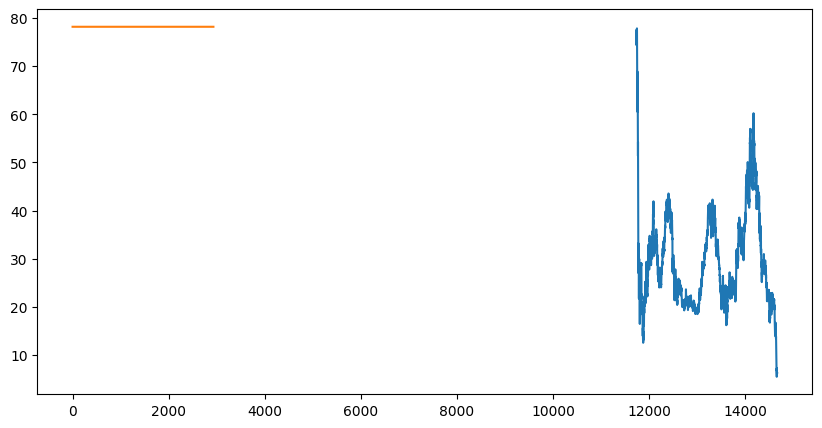

In [32]:
# first we will redefine the data splitting without scaling for a simple moving average baseline
train_split = 0.8
split_idx = int(np.ceil(len(stock_data)*train_split))
train = stock_data[['Close']].iloc[:split_idx]
test = stock_data[['Close']].iloc[split_idx:]

# then we will calculate the simple moving average over a window of 10 days for the training data
test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_pred)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

# then we will plot the true test values and the simple moving average predictions
plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_pred)
plt.show()

# EMA

Exponential Moving Average (EMA) improves upon SMA by assigning greater weight to more recent observations, allowing predictions to respond more quickly to changes in the underlying time series. Using simple exponential smoothing, the model is iteratively updated as new test values become available, producing a smoother yet adaptive forecast. Despite this improvement, EMA remains a purely statistical technique that cannot capture complex temporal dependencies or nonlinear patterns, resulting in limited performance when compared to recurrent neural network models.

In [ ]:
# installs
!pip install statsmodels


/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: Es

Test RMSE: 50.660
Test MAPE: 1.978


/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


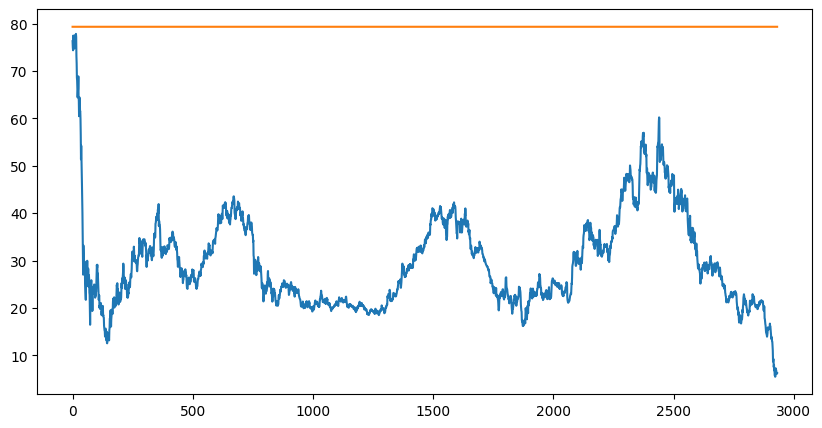

In [34]:
# importing necessary libraries for exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

# first we will redefine the data splitting without scaling for exponential smoothing
X = stock_data[['Close']].values
train_split = 0.8
split_idx = int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

# then we will apply simple exponential smoothing iteratively to forecast each point in the test set
for i in range(len(test)):
  train_fit = np.concatenate((train, np.asarray(test_concat)))
  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)
  test_pred = fit.forecast(1)
  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

# and here we will calculate and print the RMSE and MAPE metrics for the exponential smoothing predictions
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_concat)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

# Different Averaging

 Here we will do Different Averaging, this is an alternative averaging approach that predicts future values by dynamically computing the mean of a short, sliding historical window at each time step. Unlike SMA and EMA, which rely on fixed or exponentially weighted windows, this method updates its history incrementally, making it slightly more responsive to recent changes. However, it still assumes that future prices can be approximated by local averages, restricting its ability to model long-term dependencies or abrupt shifts, and thus serving primarily as a lightweight baseline rather than a robust forecasting model.

Test RMSE: 0.967
Test MAPE: 0.018


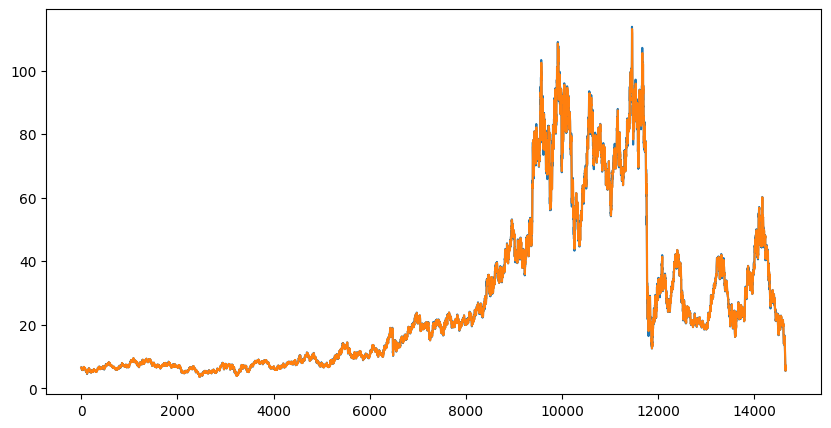

In [35]:
# here we will implement a simple moving average baseline model
X = stock_data[['Close']].values
time_steps = 2

# then we will do the data preparation
history = [X[i] for i in range(time_steps)]
ytest = [X[i] for i in range(time_steps, len(X))]
ypred_list = []

# then we will make predictions using the simple moving average approach
for t in range(len(ytest)):
	ypred = np.mean([history[i] for i in range(len(history)-time_steps,len(history))])
	ypred_list.append(ypred)
	history.append(ytest[t])

# and here we will calculate and print the RMSE and MAPE metrics for the simple moving average predictions
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(ytest, ypred_list)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(ytest, ypred_list))

plt.figure(figsize=(10,5))
plt.plot(ytest)
plt.plot(ypred_list)
plt.show()

# RNN Implementation

Here we are implementing a model SimpleRNN with 50 hidden units to capture temporal patterns in the stock price time series. Unlike LSTMs, the SimpleRNN lacks gating mechanisms and depends entirely on its recurrent hidden state, which restricts its ability to retain long-term information. A dropout layer is included to mitigate overfitting, followed by a dense output layer for price prediction. The model is trained for 20 epochs using mean squared error loss and the Adam optimizer. While it follows short-term movements reasonably well, the full and zoomed comparison plots show that it is less stable and slightly less accurate than the LSTM, illustrating the limitations of basic RNN architectures for modeling longer and noisier financial time series.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# so here we will define a simple RNN model
rnn_model = Sequential([
    SimpleRNN(
        units=50,
        activation='tanh',
        return_sequences=False,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    Dropout(0.2),
    Dense(1)
])

# then we will compile the RNN model using Adam optimizer and mean squared error loss
rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# and we will print the summary of the RNN model
rnn_model.summary()


/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# here we will train the RNN model on the training data
history_rnn = rnn_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0517 - val_loss: 0.0084
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.0097 - val_loss: 0.0057
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0079 - val_loss: 0.0040
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0066 - val_loss: 0.0057
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0064 - val_loss: 0.0062
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0058 - val_loss: 0.0046
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.0055 - val_loss: 0.0039
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0055 - val_loss: 0.0063
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0049 - val_loss: 0.0043
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 12/20
330/330 ━━━━━━━━━━━━━━━━

In [38]:
# then we will make predictions on the test data using the trained RNN model
rnn_predictions = rnn_model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
# and then we will calculate and print the RMSE and MAE metrics for the RNN model's predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# calculating RMSE and MAE
rmse_rnn = np.sqrt(mean_squared_error(y_test, rnn_predictions))
mae_rnn = mean_absolute_error(y_test, rnn_predictions)

print("Simple RNN RMSE:", rmse_rnn)
print("Simple RNN MAE:", mae_rnn)


Simple RNN RMSE: 0.02202752604848776
Simple RNN MAE: 0.016098033169925818


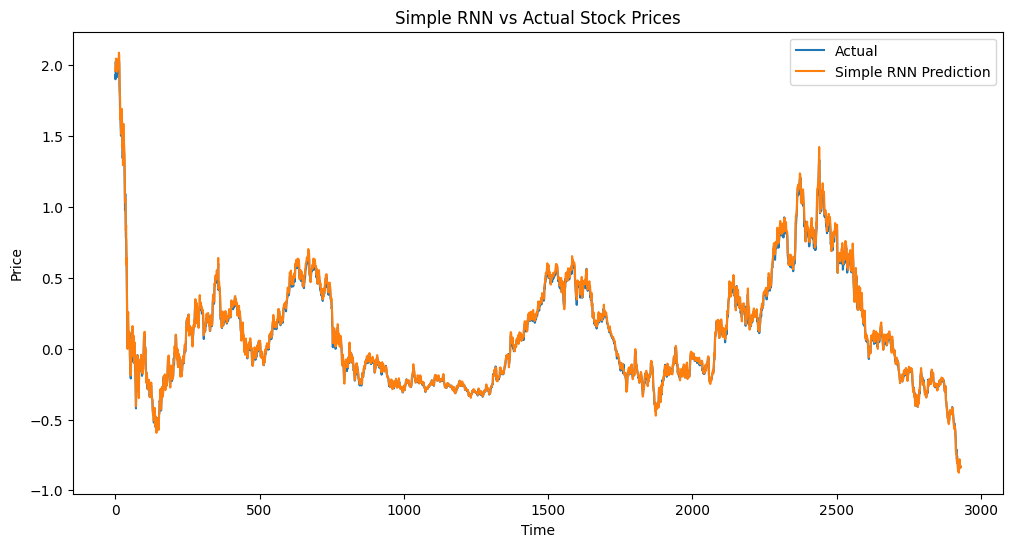

In [40]:
import matplotlib.pyplot as plt

# now we will plot the RNN predictions against the actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='Simple RNN Prediction')
plt.title('Simple RNN vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Shapes -> y_test: (2930,) | RNN: (2930,) | LSTM: (2930,)


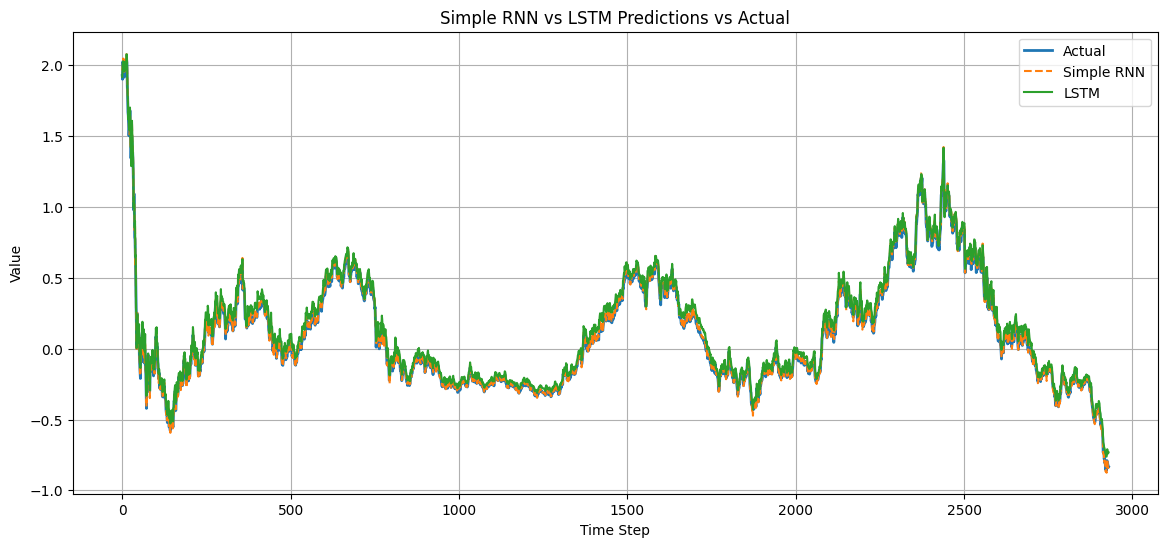

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# so first we will make sure shapes match by flattening (n,1) -> (n,)
y_test_flat = np.array(y_test).squeeze()

# then we will flatten the LSTM predictions
lstm_pred_flat = np.array(y_pred).squeeze()

# here we will flatten the RNN predictions
rnn_pred_flat = np.array(rnn_predictions).squeeze() 

# we added a quick check to verify shapes
print("Shapes -> y_test:", y_test_flat.shape,
      "| RNN:", rnn_pred_flat.shape,
      "| LSTM:", lstm_pred_flat.shape)

# and then we will plot the RNN and LSTM predictions against the actual values
plt.figure(figsize=(14, 6))
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM", linestyle="-")

plt.title("Simple RNN vs LSTM Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


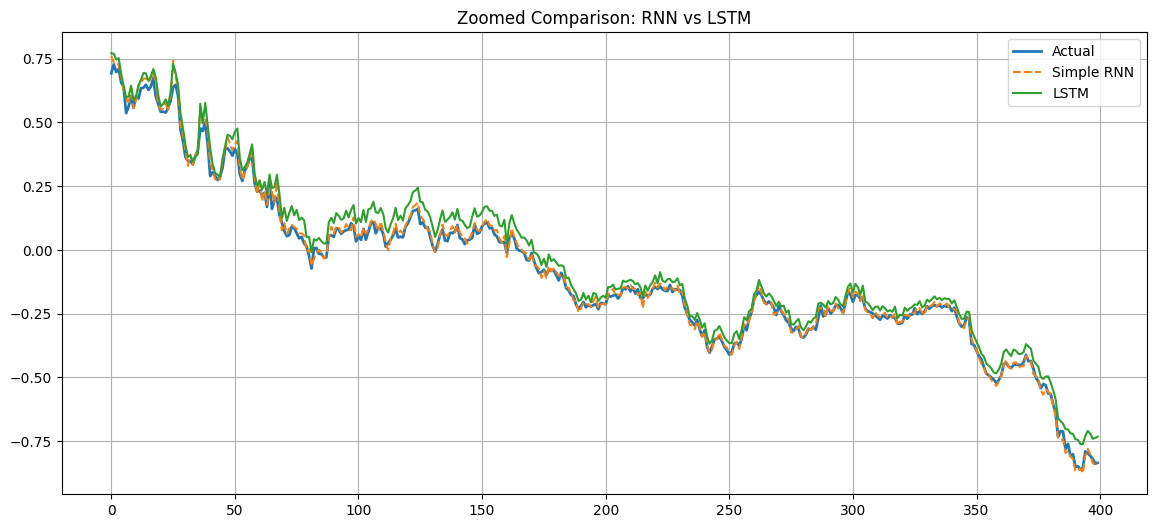

In [118]:
# here we are going to plot a zoomed-in comparison of the RNN and LSTM predictions
zoom = 400
plt.figure(figsize=(14,6))
plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.title("Zoomed Comparison: RNN vs LSTM")
plt.legend()
plt.grid(True)
plt.show()


# GRU Implementation

Here we will be implementing GRU (Gated Recurrent Unit) is a gated recurrent neural network designed to model sequential data while being more parameter-efficient than LSTM. In this implementation, a single GRU layer with 50 units processes sliding windows of past stock prices and learns temporal dependencies using update and reset gates, which help control how much past information is retained. A dropout layer is applied to reduce overfitting, followed by a dense output layer that predicts the next time step’s price. The model is trained for 20 epochs using the Adam optimizer and mean squared error loss, balancing learning stability with computational efficiency. GRU provides performance comparable to LSTM while using fewer parameters, making it a strong middle ground between Simple RNN and LSTM for time-series forecasting.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# so first we will build GRU model
gru_model = Sequential([
    GRU(
        units=50,
        activation='tanh',
        return_sequences=False,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    Dropout(0.2),
    Dense(1)
])

# then we will compile the GRU model using Adam optimizer and mean squared error loss
gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# and we will print the summary of the GRU model
gru_model.summary()


/Users/jaynama/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         8,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,301 (32.43 KB)

 Trainable params: 8,301 (32.43 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# here we will train the GRU model on the training data
history_gru = gru_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0479 - val_loss: 0.0064
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049 - val_loss: 0.0216
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - val_loss: 0.0020
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 12/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [45]:
# then we will make predictions on the test data using the trained GRU model
gru_predictions = gru_model.predict(X_test)
gru_pred_flat = np.array(gru_predictions).squeeze()


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# here we will calculate and print the RMSE and MAE metrics for the GRU model's predictions
rmse_gru = np.sqrt(mean_squared_error(y_test_flat, gru_pred_flat))
mae_gru = mean_absolute_error(y_test_flat, gru_pred_flat)

print("GRU RMSE:", rmse_gru)
print("GRU MAE:", mae_gru)


GRU RMSE: 0.021165953326987837
GRU MAE: 0.015164075665626381


Shapes -> y_test: (2930,) | GRU: (2930,)


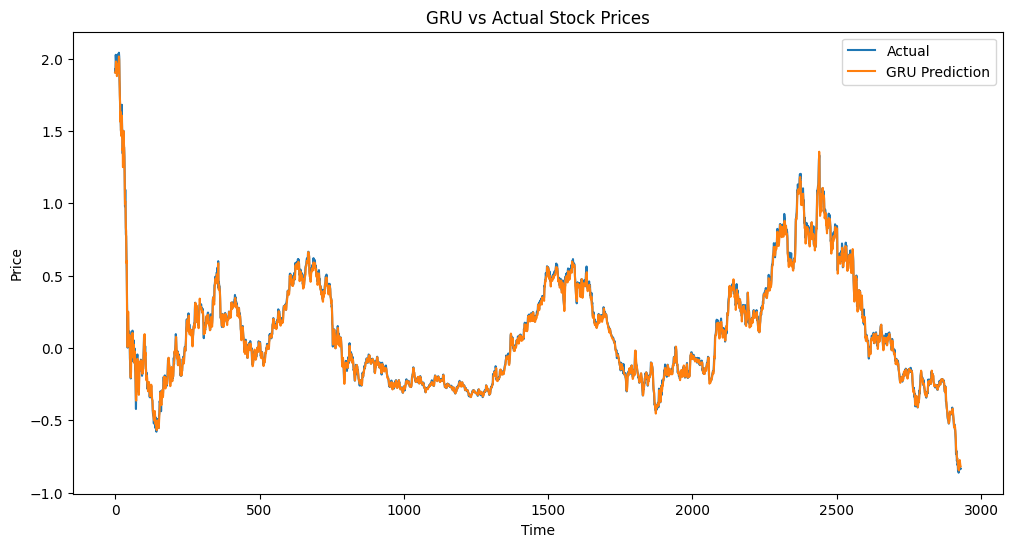

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# here we will flatten y_test and GRU predictions
y_test_flat = np.array(y_test).squeeze()
gru_pred_flat = np.array(gru_predictions).squeeze()

# here we will print the shapes for verification
print("Shapes -> y_test:", y_test_flat.shape, "| GRU:", gru_pred_flat.shape)

# and then we will plot the GRU predictions against the actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_flat, label='Actual')
plt.plot(gru_pred_flat, label='GRU Prediction')

plt.title('GRU vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


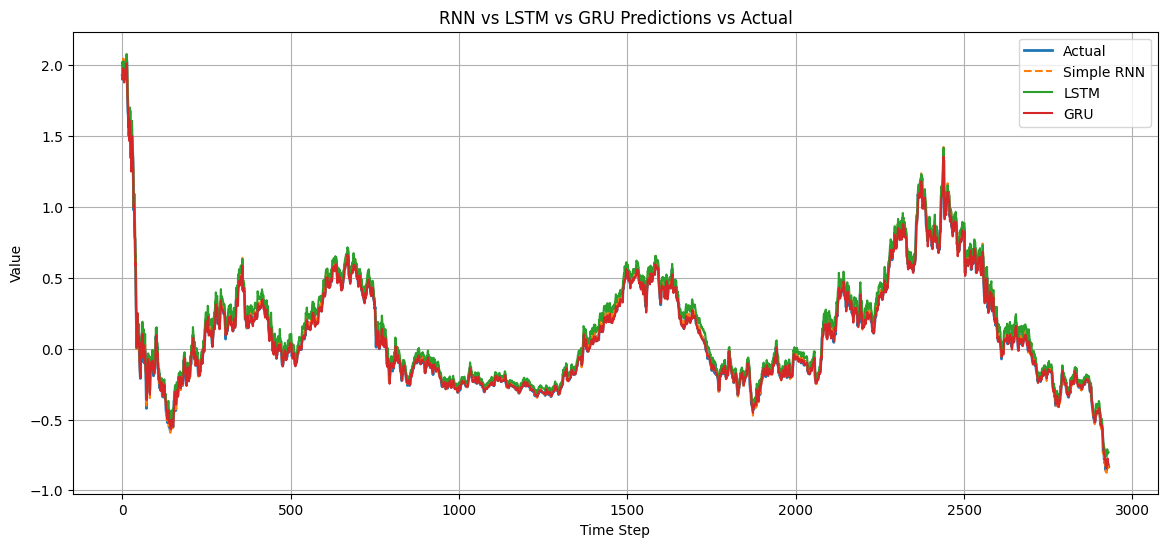

In [48]:
# here we will plot RNN vs LSTM vs GRU predictions against actual values
plt.figure(figsize=(14,6))

plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM")
plt.plot(gru_pred_flat, label="GRU")

plt.title("RNN vs LSTM vs GRU Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


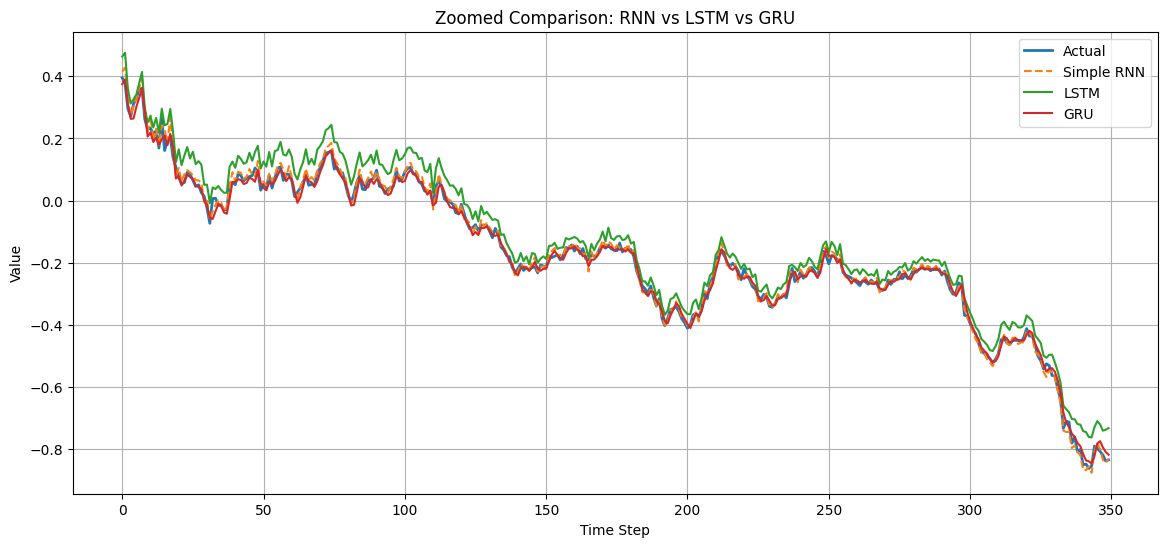

In [ ]:
# here we will plot a zoomed-in comparison of RNN vs LSTM vs GRU predictions
zoom = 350

plt.figure(figsize=(14,6))

# plotting the last 'zoom' time steps
plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.plot(gru_pred_flat[-zoom:], label="GRU")

plt.title("Zoomed Comparison: RNN vs LSTM vs GRU")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# Transformer Encoder Implementation

Here we will implement a Transformer encoder architecture to model the time series by relying on self-attention rather than recurrence. Each input window is processed through a multi-head self-attention layer that allows the model to weigh all time steps in the sequence simultaneously, followed by a feed-forward network with residual connections and layer normalization for stability. Global average pooling is then applied to collapse the sequence dimension before a final dense layer produces the prediction. The model is trained for 20 epochs, balancing learning capacity and overfitting, and is designed to capture longer-range dependencies more effectively than RNN-based models, although it can appear slightly smoother and less reactive to short-term fluctuations in the zoomed comparison.

In [61]:
# first we will import necessary libraries for building the Transformer model
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization,
    MultiHeadAttention, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [62]:
# so first we will have to define a Transformer encoder block
def transformer_encoder_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # so here we will implement the self-attention mechanism
    attention_output = MultiHeadAttention(
        key_dim=head_size,
        num_heads=num_heads,
        dropout=dropout
    )(inputs, inputs)

    # here we will add dropout and layer normalization
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(
        inputs + attention_output
    )

    # and then here we will implement the feed forward network
    ff_output = Dense(ff_dim, activation="relu")(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(dropout)(ff_output)

    # finally we will add another layer normalization
    output = LayerNormalization(epsilon=1e-6)(
        attention_output + ff_output
    )

    # aand we will return the output of the Transformer encoder block
    return output


In [63]:
# here we will build the Transformer model
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# here is the Transformer Encoder Stack
x = transformer_encoder_block(
    inputs,
    head_size=32,
    num_heads=4,
    ff_dim=64,
    dropout=0.1
)

# here we are doing Global pooling which is required to collapse sequence dimension
x = GlobalAveragePooling1D()(x)

# we will add the Output layer
outputs = Dense(1)(x)

# here we will define the complete Transformer model
transformer_model = Model(inputs, outputs)

# and we will compile the Transformer model using Adam optimizer and mean squared error loss
transformer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mean_squared_error"
)

# and finally we will print the summary of the Transformer model
transformer_model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 10, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 3)     │      1,923 │ input_layer_6[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 10, 3)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 10, 3)     │          0 │ input_layer_6[0]… │
│                     │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 3)     │          6 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10, 64)    │        256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 10, 3)     │        195 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 10, 3)     │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 10, 3)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 3)     │          6 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 3)         │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │          4 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,390 (9.34 KB)

 Trainable params: 2,390 (9.34 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# here we will train the Transformer model on the training data
history_transformer = transformer_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0594 - val_loss: 0.1292
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0198 - val_loss: 0.0428
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149 - val_loss: 0.0614
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0136 - val_loss: 0.0235
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0134 - val_loss: 0.1006
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121 - val_loss: 0.0220
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0605
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0118 - val_loss: 0.0412
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0120 - val_loss: 0.0982
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0123 - val_loss: 0.0604
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 - val_loss: 0.0279
Epoch 12/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [65]:
# and then we will make predictions on the test data using the trained Transformer model
transformer_predictions = transformer_model.predict(X_test)
transformer_pred_flat = transformer_predictions.squeeze()

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
from sklearn.metrics import mean_squared_error
import numpy as np

# here we will calculate and print the RMSE metric for the Transformer model's predictions
rmse_transformer = np.sqrt(mean_squared_error(y_test_flat, transformer_pred_flat))
print("Transformer RMSE:", rmse_transformer)


Transformer RMSE: 0.07015416170975594


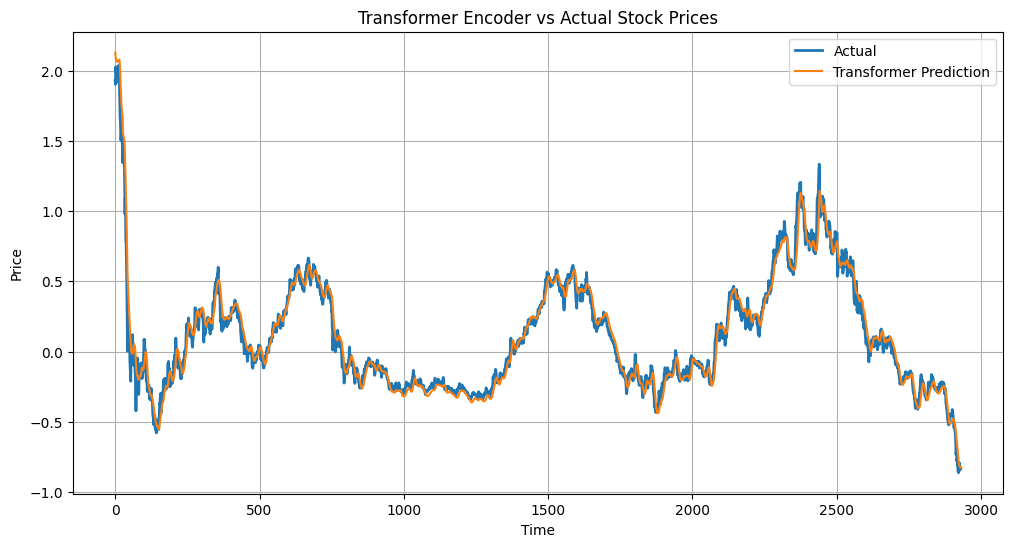

In [67]:
# and now we will plot the Transformer predictions against the actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(transformer_pred_flat, label="Transformer Prediction")

plt.title("Transformer Encoder vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


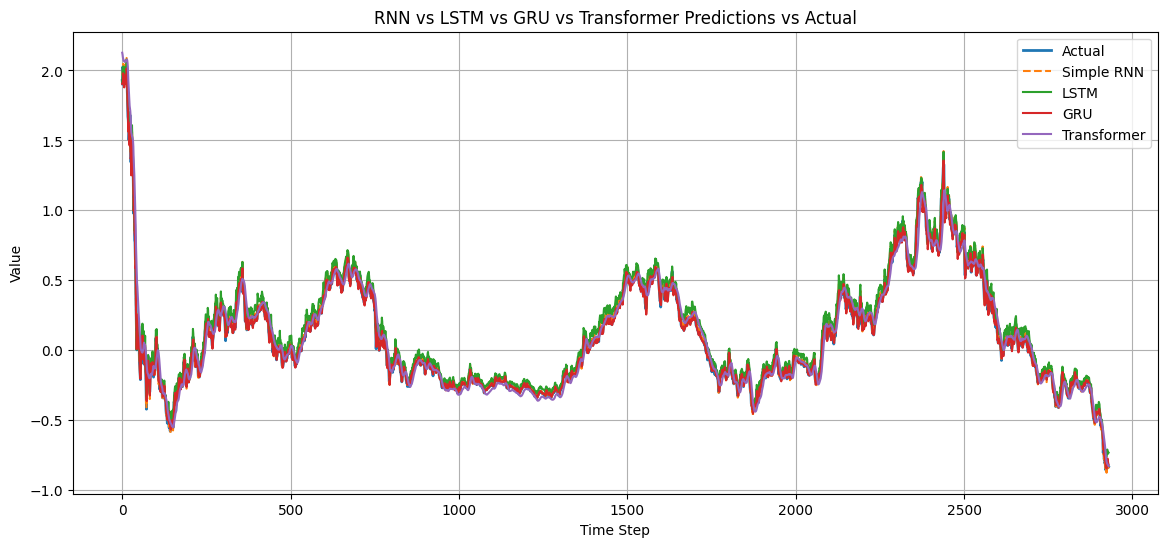

In [68]:
import matplotlib.pyplot as plt

# here we will plot RNN vs LSTM vs GRU vs Transformer predictions against actual values
plt.figure(figsize=(14, 6))

plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM")
plt.plot(gru_pred_flat, label="GRU")
plt.plot(transformer_pred_flat, label="Transformer")

# then we will add titles and labels
plt.title("RNN vs LSTM vs GRU vs Transformer Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


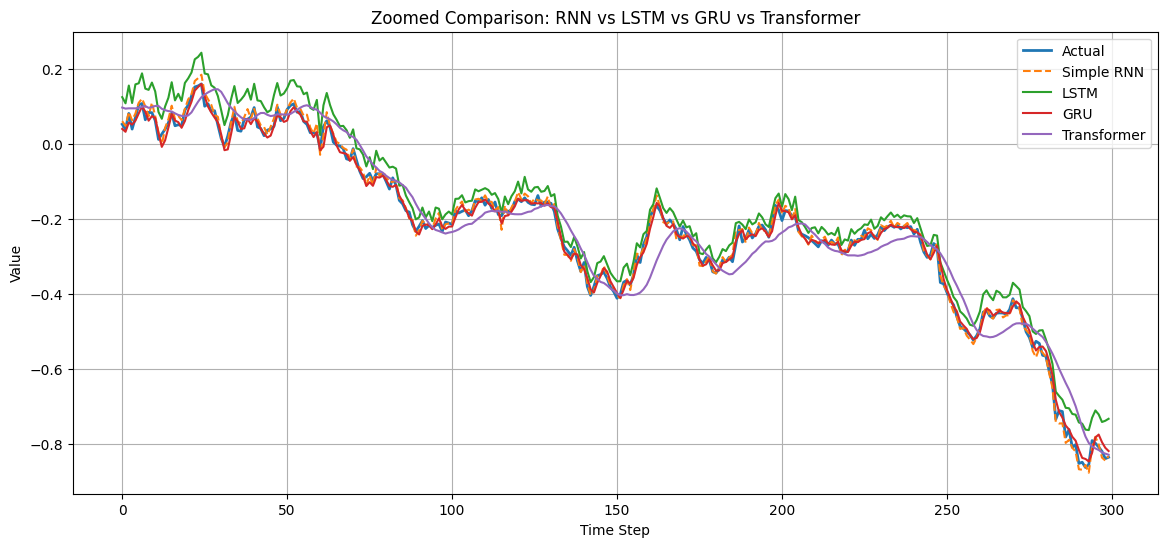

In [ ]:
# here we will plot a zoomed-in comparison of RNN vs LSTM vs GRU vs Transformer predictions
zoom = 300

plt.figure(figsize=(14, 6))

# we will plot the last 'zoom' time steps
plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.plot(gru_pred_flat[-zoom:], label="GRU")
plt.plot(transformer_pred_flat[-zoom:], label="Transformer")

plt.title("Zoomed Comparison: RNN vs LSTM vs GRU vs Transformer")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# CNN + BiLSTM + Attention Implementation

Here we will be doing CNN + BiLSTM + Attention model, it combines three ideas: the CNN first extracts short-term local patterns from the time series (like sudden movements), the Bidirectional LSTM then models longer-term temporal dependencies in both forward and backward directions, and the Attention mechanism learns to focus on the most important time steps when making the final prediction. After attention, the sequence is flattened and passed through a dense layer to output a single predicted value. You train the model for 20 epochs, which allows it to converge while limiting overfitting, and the strong visual overlap with the ground truth suggests it is one of the most expressive models in your comparison set.

In [71]:
# here we will first import necessary libraries for building the model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D,
    Bidirectional, LSTM,
    Attention, Flatten, Dense, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [72]:
# so first we will define the input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# here we will add the Convolutional layer with MaxPooling layer
x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)

# then we will add the Bidirectional LSTM layer
x = Bidirectional(
    LSTM(50, return_sequences=True)
)(x)

# and then we will add the Attention layer
attention_out = Attention()([x, x])

# so we will flatten the output and add a Dense output layer
x = Flatten()(attention_out)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

# then we will define the complete CNN + BiLSTM + Attention model
cnn_bilstm_attention_model = Model(inputs, outputs)

# we will compile the model using Adam optimizer and mean squared error loss
cnn_bilstm_attention_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# and we will print the summary of the CNN + BiLSTM + Attention model
cnn_bilstm_attention_model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 10, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 8, 64)     │        640 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 4, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 4, 100)    │     46,000 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 4, 100)    │          0 │ bidirectional[0]… │
│ (Attention)         │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 400)       │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 400)       │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        401 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 47,041 (183.75 KB)

 Trainable params: 47,041 (183.75 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# here we will train the CNN + BiLSTM + Attention model on the training data
history_cnn_bilstm_attention = cnn_bilstm_attention_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0220 - val_loss: 0.0132
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051 - val_loss: 0.0146
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0152
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0549
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0066
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0149
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0165
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0158
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0296
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 12/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [74]:
# then we will make predictions on the test data using the trained CNN + BiLSTM + Attention model
cnn_bilstm_attention_predictions = cnn_bilstm_attention_model.predict(X_test)
cnn_bilstm_attention_pred_flat = cnn_bilstm_attention_predictions.squeeze()

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# we will calculate and print the RMSE metric for the CNN + BiLSTM + Attention model's predictions
y_test_flat = np.array(y_test).squeeze()
cnn_bilstm_attention_pred_flat = np.array(cnn_bilstm_attention_predictions).squeeze()
rmse_cnn_bilstm_attention = np.sqrt(
    mean_squared_error(y_test_flat, cnn_bilstm_attention_pred_flat)
)

print("CNN-BiLSTM-Attention RMSE:", rmse_cnn_bilstm_attention)

CNN-BiLSTM-Attention RMSE: 0.029904464754521548


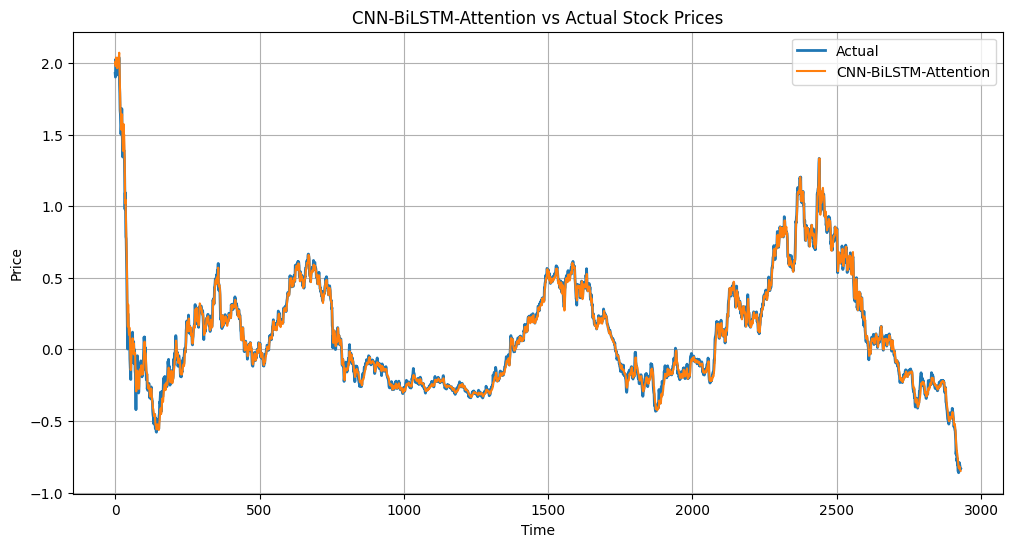

In [76]:
# and then we will plot the CNN + BiLSTM + Attention predictions against the actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(cnn_bilstm_attention_pred_flat, label="CNN-BiLSTM-Attention")

plt.title("CNN-BiLSTM-Attention vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

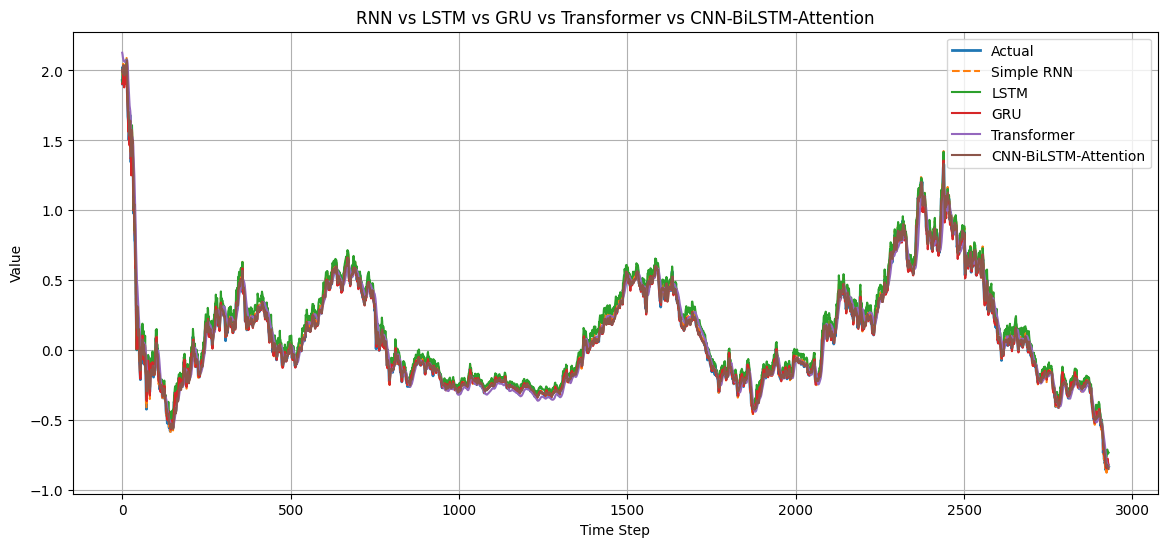

In [77]:
import matplotlib.pyplot as plt

# here we will plot RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention predictions against actual values
plt.figure(figsize=(14, 6))

plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM")
plt.plot(gru_pred_flat, label="GRU")
plt.plot(transformer_pred_flat, label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat, label="CNN-BiLSTM-Attention")

# then we will add titles and labels
plt.title("RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


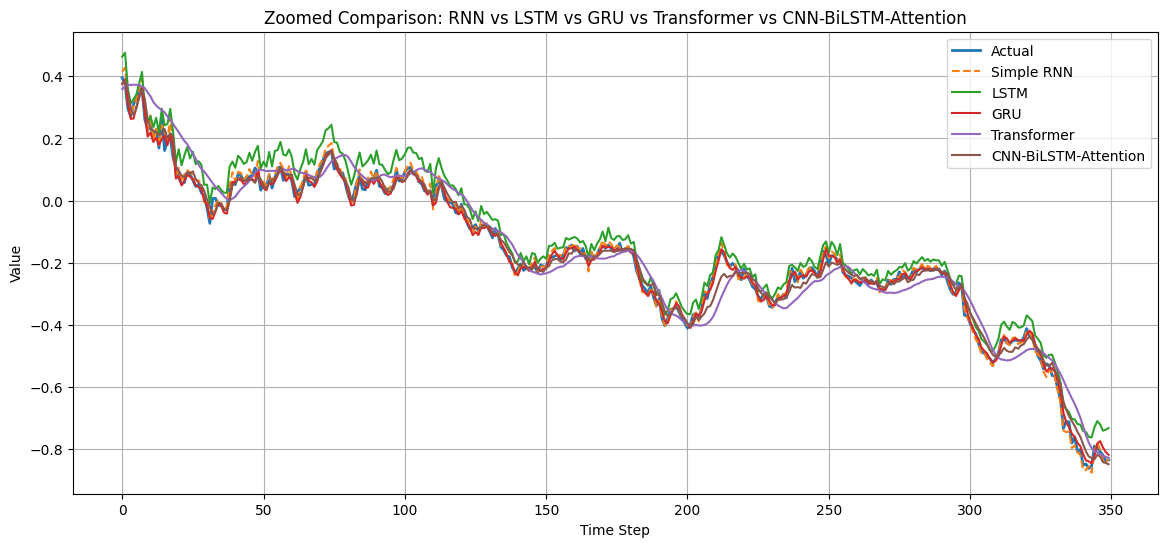

In [ ]:
# here we will plot a zoomed-in comparison of RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention predictions
zoom = 350

plt.figure(figsize=(14, 6))

# we will plot the last 'zoom' time steps
plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.plot(gru_pred_flat[-zoom:], label="GRU")
plt.plot(transformer_pred_flat[-zoom:], label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat[-zoom:], label="CNN-BiLSTM-Attention")

plt.title("Zoomed Comparison: RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# Random Walk Implementation

Here we will implement the Random Walk model which is not ideal for stock price prediction. Instead of learning patterns from historical data, it assumes the next value is simply the previous value plus small random noise. This reflects the classic “random walk” assumption in finance and ignores trends, seasonality, and temporal dependencies. Its purpose in the project is comparative: by performing significantly worse than learned models (RNN, LSTM, GRU, Transformer, CNN-BiLSTM-Attention), it highlights the value of structured sequence modeling and demonstrates that naïve stochastic approaches are unsuitable for predictive accuracy.

In [79]:
# here we will first import necessary libraries for building the Random Walk model

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# we will first define the input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# then we will add a Dense output layer
x = Dense(1)(inputs)

# then we will define the complete Random Walk model
random_walk_model = Model(inputs, x)

# and we will compile the Random Walk model using Adam optimizer and mean squared error loss
random_walk_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# finally we will print the summary of the Random Walk model
random_walk_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10, 1)          │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
# here we will train the Random Walk model on the training data
history_random_walk = random_walk_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 1.0811 - val_loss: 6.6858
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.7976 - val_loss: 5.2177
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.7897 - val_loss: 5.1268
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.7897 - val_loss: 5.1433
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.7897 - val_loss: 5.1763
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.7895 - val_loss: 5.1540
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.7897 - val_loss: 5.1635
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.7900 - val_loss: 5.1962
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.7896 - val_loss: 5.1459
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.7898 - val_loss: 5.2084
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.7897 - val_loss: 5.2061
Epoch 12/20
330/330 ━━━━━━━━━━

In [81]:
# here we will make predictions on the test data using the trained Random Walk model
# but since Random Walk is a naive model, we will implement it manually
random_walk_pred_flat = np.zeros_like(y_test_flat)

# so first prediction is the last value from training set
random_walk_pred_flat[0] = y_train[-1] if len(y_train.shape) == 1 else y_train[-1, -1]

# and then each subsequent prediction is the previous prediction plus a small random noise
np.random.seed(42)
for i in range(1, len(random_walk_pred_flat)):
    noise = np.random.uniform(-0.02, 0.02) 
    random_walk_pred_flat[i] = random_walk_pred_flat[i-1] + noise

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# here we will flatten y_test and Random Walk predictions
y_test_flat = np.array(y_test_flat).squeeze()
random_walk_pred_flat = np.array(random_walk_pred_flat).squeeze()

# and then we will calculate and print the RMSE metric for the Random Walk model's predictions
rmse_random_walk = np.sqrt(mean_squared_error(y_test_flat, random_walk_pred_flat))

print("Random Walk RMSE:", rmse_random_walk)

Random Walk RMSE: 1.795121753557894


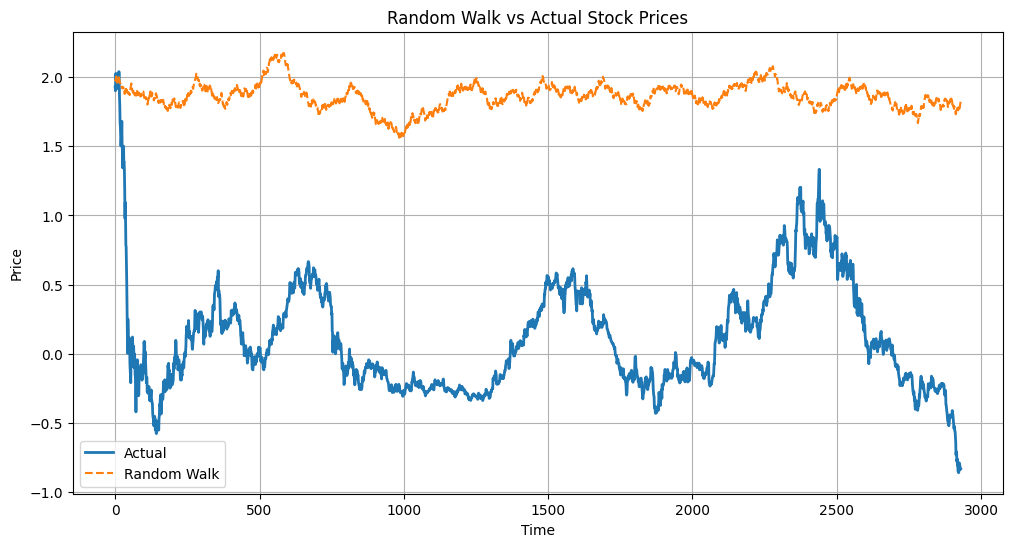

In [83]:
# and here we will plot the Random Walk predictions against the actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(random_walk_pred_flat, label="Random Walk", linestyle="--")

plt.title("Random Walk vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

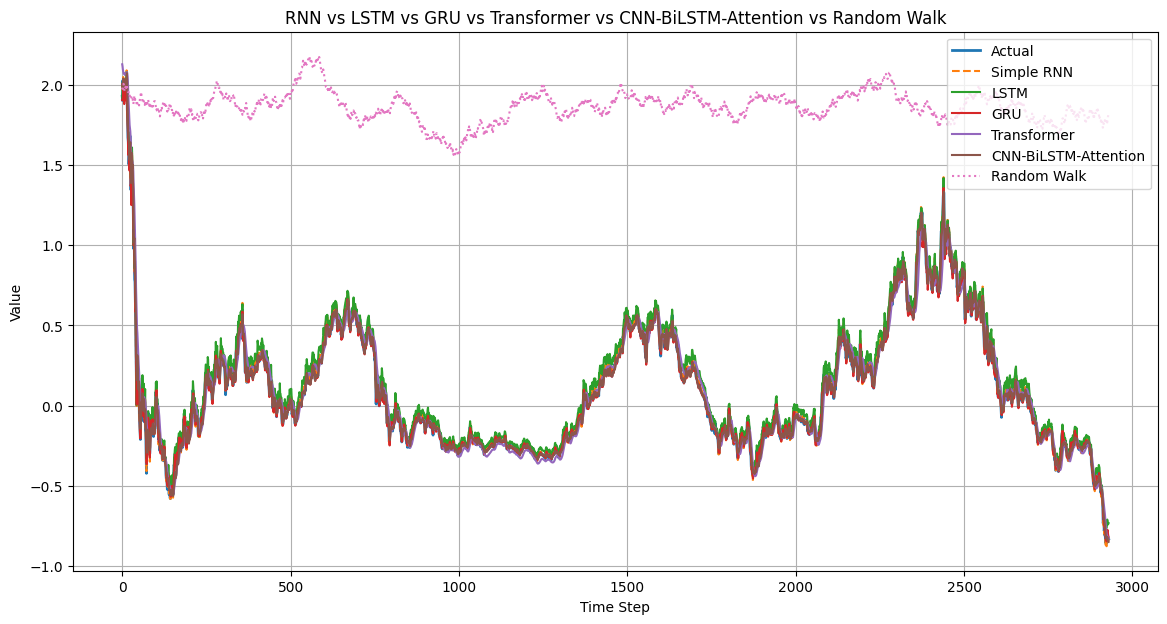

In [89]:
# here we will plot RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention vs Random Walk predictions against actual values
plt.figure(figsize=(14, 7))

# we will plot all model predictions against actual values
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM")
plt.plot(gru_pred_flat, label="GRU")
plt.plot(transformer_pred_flat, label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat, label="CNN-BiLSTM-Attention")
plt.plot(random_walk_pred_flat, label="Random Walk", linestyle=":")

plt.title("RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention vs Random Walk")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

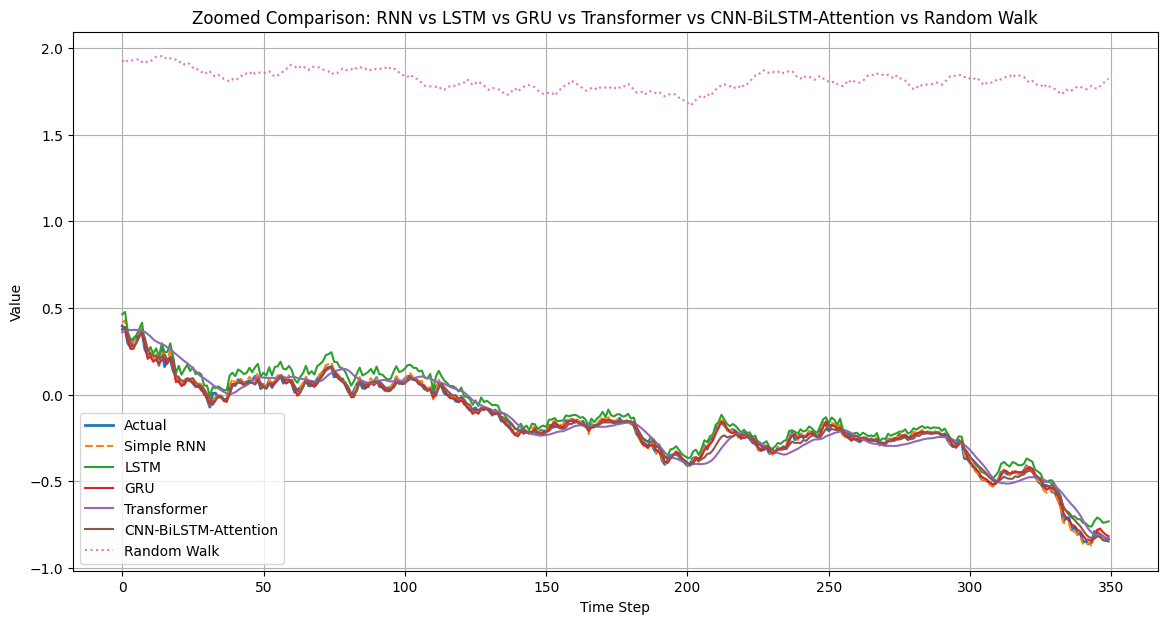

In [95]:
# and here we will plot a zoomed-in comparison of all model predictions
zoom = 350 

plt.figure(figsize=(14, 7))

# and here we will plot the last 'zoom' time steps
plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.plot(gru_pred_flat[-zoom:], label="GRU")
plt.plot(transformer_pred_flat[-zoom:], label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat[-zoom:], label="CNN-BiLSTM-Attention")
plt.plot(random_walk_pred_flat[-zoom:], label="Random Walk", linestyle=":")

# then we will add titles and labels
plt.title("Zoomed Comparison: RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention vs Random Walk")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Over-Regularized Deep LSTM Implementation

Here will implement a deep stacked LSTM model that is also not ideal for the stock price data, and we will be applying excessive regularization to notice the results. It uses three LSTM layers with very strong L2 regularization (l2(0.5)), extremely high dropout rates (80%), and batch normalization after each layer. While the depth and parameter count make the model appear complex, the aggressive regularization severely restricts learning, causing the model to smooth out price movements and fail to capture volatility or trends. Training is performed for 20 epochs, but the model struggles to converge meaningfully, making it a useful negative example that demonstrates how excessive regularization can degrade performance despite high architectural complexity.

In [96]:
# here we will first import necessary libraries for building the over-regularized LSTM model
from tensorflow.keras.layers import (
    Input, LSTM, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# so first we will define the input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# then we will add multiple LSTM layers with heavy regularization
x = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.5))(inputs)  # Massive L2!
x = Dropout(0.8)(x)  # 80% dropout is insane
x = BatchNormalization()(x)

# then we will add another LSTM layer
x = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.5))(x)
x = Dropout(0.8)(x)
x = BatchNormalization()(x)

# and finally another LSTM layer before output
x = LSTM(32, kernel_regularizer=l2(0.5))(x)
x = Dropout(0.8)(x)
x = BatchNormalization()(x)

# here we will add the Dense output layer with heavy L2 regularization
outputs = Dense(1, kernel_regularizer=l2(0.5))(x)

# and then we will define the complete over-regularized LSTM model
over_regularized_lstm = Model(inputs, outputs)

# we will compile the over-regularized LSTM model using Adam optimizer and mean squared error loss
over_regularized_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# finally we will print the summary of the over-regularized LSTM model
over_regularized_lstm.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 10, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,337 (509.13 KB)

 Trainable params: 129,889 (507.38 KB)

 Non-trainable params: 448 (1.75 KB)

In [97]:
# here we will train the over-regularized LSTM model on the training data
history_over_reg = over_regularized_lstm.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 24.7076 - val_loss: 4.5699
Epoch 2/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5248 - val_loss: 2.1085
Epoch 3/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2735 - val_loss: 0.1117
Epoch 4/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2538 - val_loss: 2.0009
Epoch 5/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2406 - val_loss: 0.1329
Epoch 6/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2425 - val_loss: 0.1197
Epoch 7/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2487 - val_loss: 1.2444
Epoch 8/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2372 - val_loss: 0.5257
Epoch 9/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2526 - val_loss: 0.5965
Epoch 10/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2557 - val_loss: 0.4649
Epoch 11/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2425 - val_loss: 1.4253
Epoch 12/20
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms

In [98]:
# and now we will make predictions on the test data using the trained over-regularized LSTM model
over_reg_predictions = over_regularized_lstm.predict(X_test)
over_reg_pred_flat = over_reg_predictions.flatten()

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [100]:
from sklearn.metrics import mean_squared_error
import numpy as np

# now we will calculate and print the RMSE metric for the over-regularized LSTM model's predictions
over_reg_rmse = np.sqrt(mean_squared_error(y_test_flat, over_reg_pred_flat))
print(f"Over-Regularized Deep LSTM RMSE: {over_reg_rmse}")


Over-Regularized Deep LSTM RMSE: 0.2644437283725023


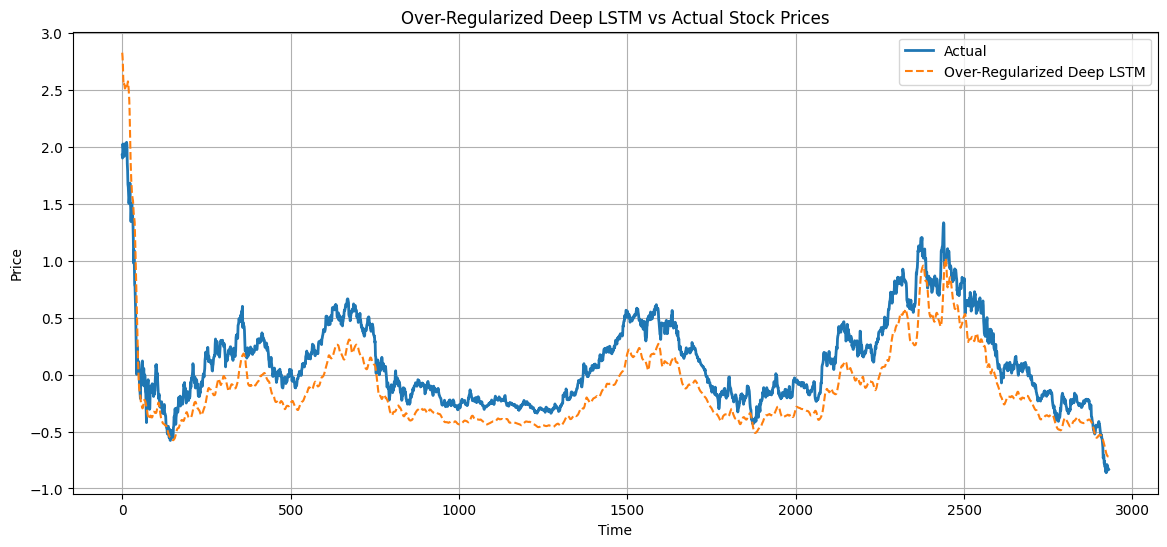

In [104]:
# and here we will plot the over-regularized LSTM predictions against the actual stock prices
plt.figure(figsize=(14,6))
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(over_reg_pred_flat, label="Over-Regularized Deep LSTM", linestyle="--")

plt.title("Over-Regularized Deep LSTM vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

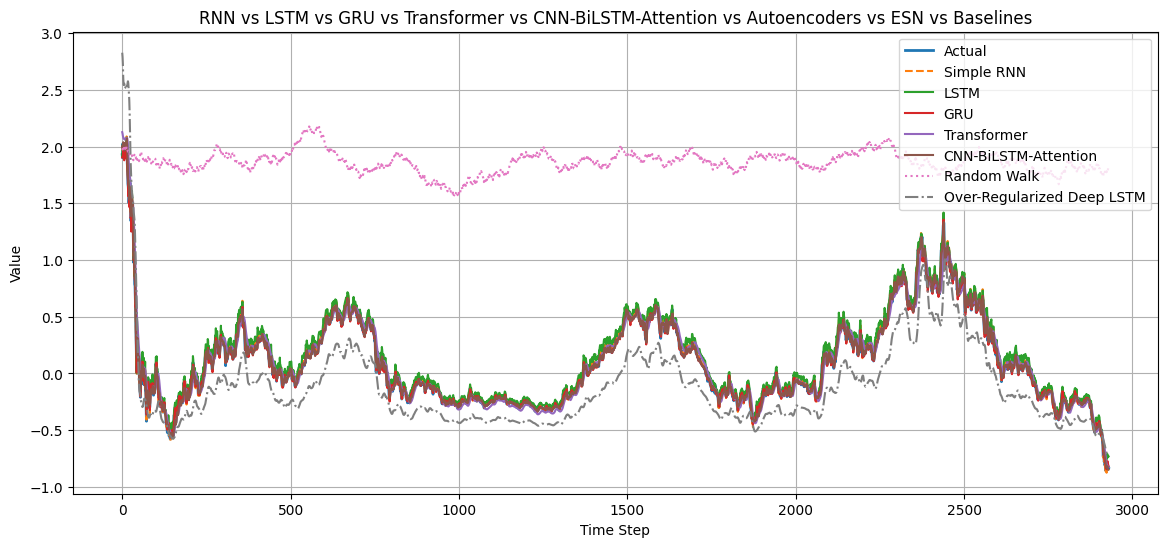

In [105]:
# here we will plot RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention vs Random Walk vs Over-Regularized Deep LSTM predictions against actual values
plt.figure(figsize=(14, 6))

# and we will plot all model predictions against actual values
plt.plot(y_test_flat, label="Actual", linewidth=2)
plt.plot(rnn_pred_flat, label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat, label="LSTM")
plt.plot(gru_pred_flat, label="GRU")
plt.plot(transformer_pred_flat, label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat, label="CNN-BiLSTM-Attention")
plt.plot(random_walk_pred_flat, label="Random Walk", linestyle=":")
plt.plot(over_reg_pred_flat, label="Over-Regularized Deep LSTM", linestyle="-.")

# then we will add titles and labels
plt.title("RNN vs LSTM vs GRU vs Transformer vs CNN-BiLSTM-Attention vs Autoencoders vs ESN vs Baselines")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

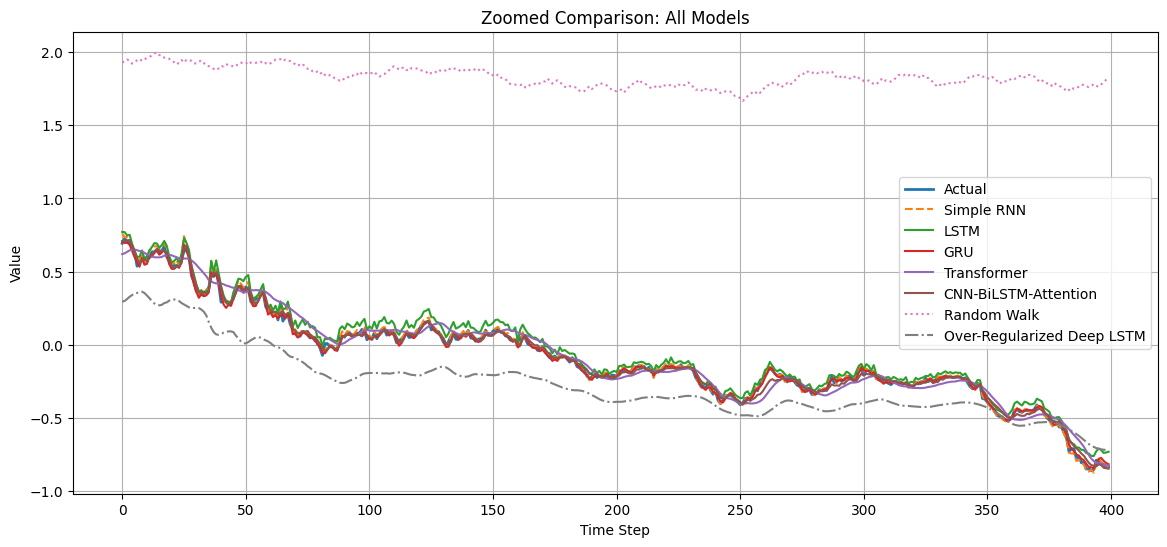

In [107]:
# and finally we will plot a zoomed-in comparison of all model predictions
zoom = 400

plt.figure(figsize=(14, 6))

plt.plot(y_test_flat[-zoom:], label="Actual", linewidth=2)
plt.plot(rnn_pred_flat[-zoom:], label="Simple RNN", linestyle="--")
plt.plot(lstm_pred_flat[-zoom:], label="LSTM")
plt.plot(gru_pred_flat[-zoom:], label="GRU")
plt.plot(transformer_pred_flat[-zoom:], label="Transformer")
plt.plot(cnn_bilstm_attention_pred_flat[-zoom:], label="CNN-BiLSTM-Attention")
plt.plot(random_walk_pred_flat[-zoom:], label="Random Walk", linestyle=":")
plt.plot(over_reg_pred_flat[-zoom:], label="Over-Regularized Deep LSTM", linestyle="-.")

plt.title("Zoomed Comparison: All Models")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Metrics Evaluation

Here in this section we are going to be fairly comparing all models, we will evaluate them using multiple regression-based and behavior-based metrics, since stock price prediction is a continuous forecasting task rather than a classification problem.

RMSE (Root Mean Squared Error) measures the square root of the average squared difference between predicted and actual prices. It penalizes large errors more heavily, making it useful for understanding how badly a model can fail on extreme price movements.

MAE (Mean Absolute Error) computes the average absolute difference between predictions and true values. Unlike RMSE, it treats all errors equally and provides a more interpretable measure of typical prediction error.

MAPE (Mean Absolute Percentage Error) expresses prediction error as a percentage of the true price. This makes it scale-independent and useful for comparing performance across different price ranges, though it can be sensitive when true values are near zero.

R² Score (Coefficient of Determination) indicates how much of the variance in stock prices is explained by the model. Values closer to 1 suggest the model captures the overall trend well, while lower values indicate poor explanatory power.

Max Error captures the single worst prediction error made by the model. This metric is important in financial contexts where large one-off mistakes can be costly, even if average performance is strong.

Directional Accuracy measures how often the model correctly predicts the direction of price movement (up or down) rather than the exact value. This is especially relevant for trading-oriented analysis, where getting the direction right can matter more than minimizing numerical error.

So overall we thought that these metrics provided a balanced evaluation of accuracy, robustness, trend-following ability, and risk, allowing meaningful comparison across all models.

In [ ]:
# here we will define a function to calculate directional accuracy
def directional_accuracy(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    true_dir = np.sign(y_true[1:] - y_true[:-1])
    pred_dir = np.sign(y_pred[1:] - y_pred[:-1])

    return np.mean(true_dir == pred_dir)


In [115]:
# first we will import necessary libraries for computing evaluation metrics
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

# here we will define a function to compute all metrics
def compute_metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100,
        "R2 Score": r2_score(y_true, y_pred),
        "Max Error": max_error(y_true, y_pred),
        "Directional Accuracy": directional_accuracy(y_true, y_pred)
    }

# and here we will create a dictionary to hold all model predictions
model_predictions = {
    "Simple RNN": rnn_pred_flat,
    "LSTM": lstm_pred_flat,
    "GRU": gru_pred_flat,
    "Transformer Encoder": transformer_pred_flat,
    "CNN-BiLSTM-Attention": cnn_bilstm_attention_pred_flat,
    "Random Walk": random_walk_pred_flat,
    "Over-Regularized Deep LSTM": over_reg_pred_flat
}

# and here we will compute metrics for each model and store the results
results = []
for model_name, preds in model_predictions.items():
    metrics = compute_metrics(y_test_flat, preds)
    metrics["Model"] = model_name
    results.append(metrics)

# and we will create a DataFrame to display the results
metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.set_index("Model").round(4)

metrics_df


,RMSE,MAE,MAPE (%),R2 Score,Max Error,Directional Accuracy
Model,,,,,,
Simple RNN,0.0220,0.0161,22.3937,0.9970,0.1201,0.7303
LSTM,0.0496,0.0452,71.8065,0.9846,0.1407,0.7774
GRU,0.0212,0.0152,19.2040,0.9972,0.1614,0.6890
Transformer Encoder,0.0702,0.0497,74.0225,0.9692,0.5274,0.5425
CNN-BiLSTM-Attention,0.0299,0.0209,30.3636,0.9944,0.2116,0.6439
Random Walk,1.7951,1.7545,2434.2612,-19.1891,2.6567,0.5063
Over-Regularized Deep LSTM,0.2644,0.2428,314.2006,0.5619,0.9620,0.4978
